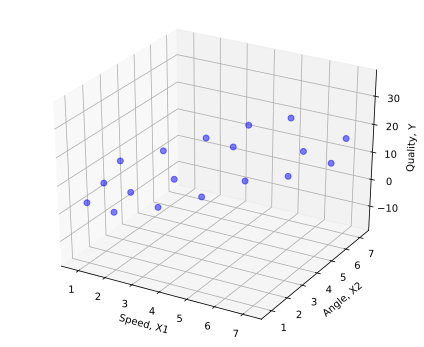

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'http://data-analytics.zybooks.com/Cars.csv'
df = pd.read_csv(file)

X = df[['Speed', 'Angle']].values.reshape(-1,2)
Y = df['Quality']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0.5, 7.5, 50)   # range of porosity values
y_pred = np.linspace(0.5, 7.5, 50)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(25, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(131, projection='3d')
ax3 = fig.add_subplot(131, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='b', zorder=15, linestyle='none', marker='o', alpha=0.5)
#    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Speed, X1')
    ax.set_ylabel('Angle, X2')
    ax.set_zlabel('Quality, Y')
    ax.set_zlim(-18,38)
    ax.set_xlim(0.5,7.5)
    ax.set_ylim(0.5,7.5)
    
%config InlineBackend.figure_formats = ['svg']
